<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
print("Valores únicos en la columna 'Class':")
print(df['Class'].unique())

Valores únicos en la columna 'Class':
[0 1]


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


En primer lugar, intentemos ver cómo afectarían las variables 'FlightNumber' (que indica los intentos de lanzamiento continuos) y 'Payload' al resultado del lanzamiento.

Podemos trazar el <code>FlightNumber</code> frente a <code>PayloadMass</code>y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelos, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; Parece que cuanto más masiva es la carga útil, menos probable es que regrese la primera etapa.

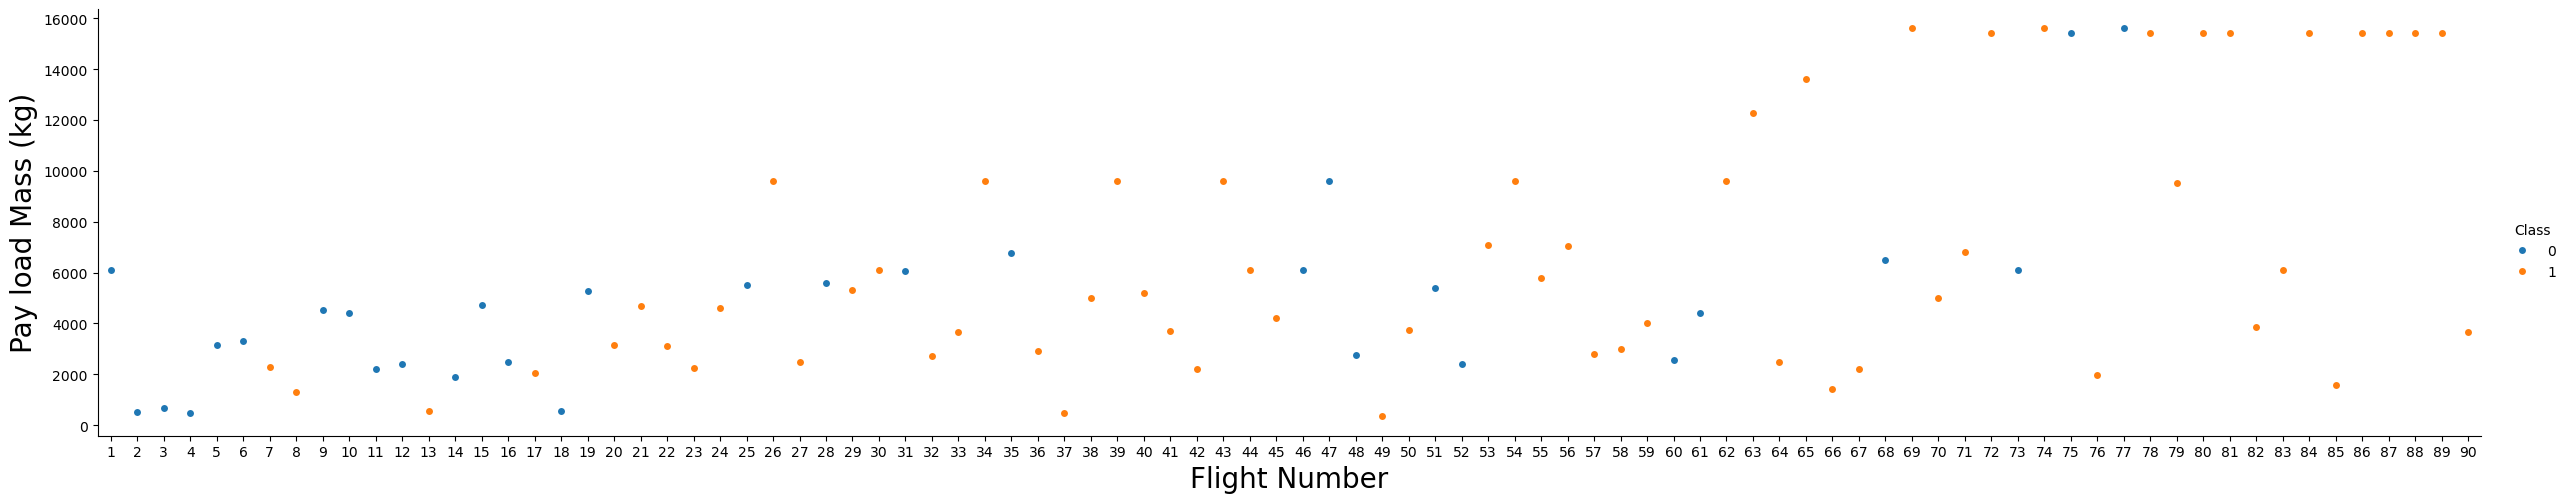

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

A continuación, profundicemos en cada sitio para visualizar sus registros de lanzamiento detallados.

### TASK 1: Visualize the relationship between Flight Number and Launch Site
### TAREA 1: Visualizar la relación entre el número de vuelo y el sitio de lanzamiento

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


Utilice la función <code>catplot</code> para trazar <code>FlightNumber</code> vs <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, <code>establezca y en</code> <code>Launch Site</code> y establezca el <code>tono</code> del parámetro en <code>'class'</code>

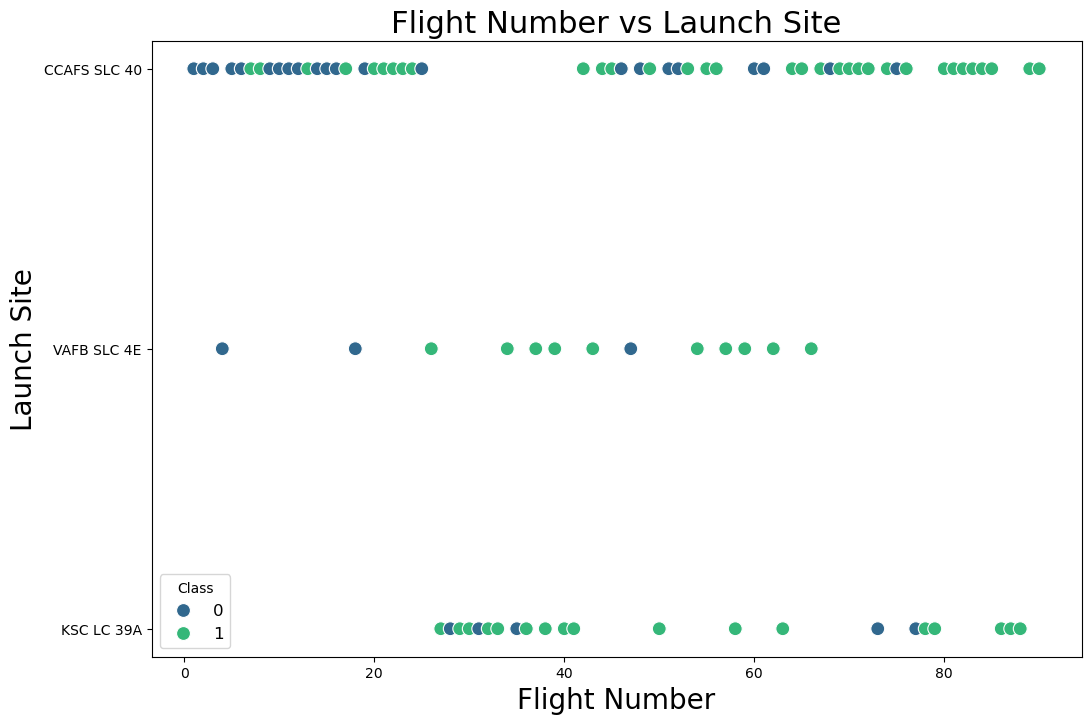

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Create a scatter plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, palette="viridis", s=100)

# Add labels and title
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Flight Number vs Launch Site", fontsize=22)

# Show the plot
plt.legend(title='Class', fontsize=12)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

Trata de explicar los patrones que encontraste en los diagramas de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.


Al analizar el gráfico de dispersión que muestra la relación entre el **número de vuelo** (`FlightNumber`) y el **sitio de lanzamiento** (`LaunchSite`), se pueden observar varios patrones y tendencias:   ### 1. **Aumento en la Frecuencia de Vuelos** - **Tendencia en el Número de Vuelos**: A medida que aumenta el número de vuelo, también parece aumentar la frecuencia de lanzamientos en algunos sitios específicos, lo que sugiere que ciertos Los sitios se han utilizado más a menudo para los lanzamientos. ### 2. **Sitios de Lanzamiento** - **Uso Preferencial de Sitios**: Algunos sitios de lanzamiento, como `CCAFS SLC 40`, pueden tener una mayor concentración de lanzamientos. Esto puede estar relacionado con la infraestructura de lanzamiento y el tipo de misiones que se realizan desde esos sitios. - **Distribución de Vuelos**: Puede haber una tendencia a realizar múltiples lanzamientos desde un sitio específico antes de cambiar a otro. Por ejemplo, si varios lanzamientos de la misma versión de cohete se realizan desde un solo sitio, esto se reflejaría en el gráfico. ### 3. **Resultados de Lanzamiento** - **Clasificación de Resultados**: Los puntos en el gráfico pueden ser coloreados según la `Class`, lo que indica el resultado del lanzamiento (éxito o fracaso). 
**Conclusión general**
El análisis de los patrones en el gráfico de dispersión del número de vuelo versus el sitio de lanzamiento no solo proporciona una comprensión de cómo se han realizado los lanzamientos en el pasado, sino que también ayuda a identificar áreas de mejora y oportunidades de optimización para futuras misiones. A medida que la industria espacial continúa evolucionando, este tipo de análisis será crucial para el desarrollo de estrategias efectivas y para garantizar la seguridad y el éxito.

### TASK 2: Visualize the relationship between Payload and Launch Site
### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento

We also want to observe if there is any relationship between launch sites and their payload mass.
También queremos observar si hay alguna relación entre los sitios de lanzamiento y su masa de carga útil.

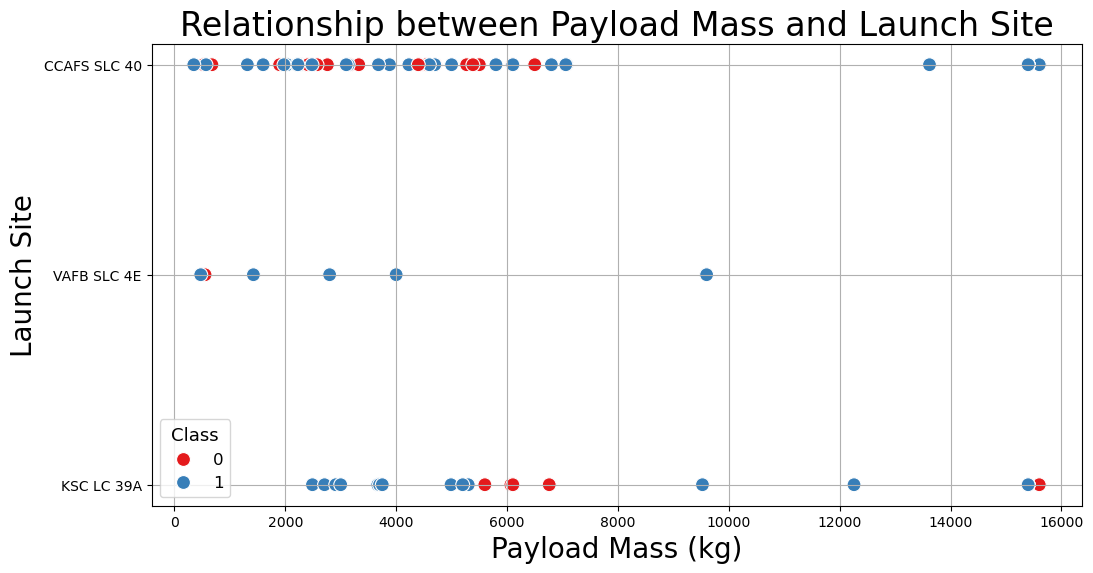

In [7]:
# Traza un gráfico de puntos de dispersión en el que el eje x sea la masa de carga de pago (kg) y el eje y sea el sitio de lanzamiento, y hue sea el valor de la clase

plt.figure(figsize=(12, 6))
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, palette="Set1", s=100)

# Añadir etiquetas y título
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Relationship between Payload Mass and Launch Site", fontsize=24)
plt.legend(title='Class', fontsize=12, title_fontsize='13')
plt.grid(True)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

Ahora, si observa el gráfico de puntos de dispersión de la carga útil frente al sitio de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no se lanzan cohetes para una masa de carga útil pesada (superior a 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type
### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

Next, we want to visually check if there are any relationship between success rate and orbit type.

A continuación, queremos comprobar visualmente si hay alguna relación entre la tasa de éxito y el tipo de órbita.

Let's create a `bar chart` for the sucess rate of each orbit
Vamos a crear un "gráfico de barras" para la tasa de éxito de cada órbita

Class
1    60
0    30
Name: count, dtype: int64


C:\Users\belen\AppData\Local\Temp\ipykernel_9848\3856863182.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=success_rate, palette='viridis')


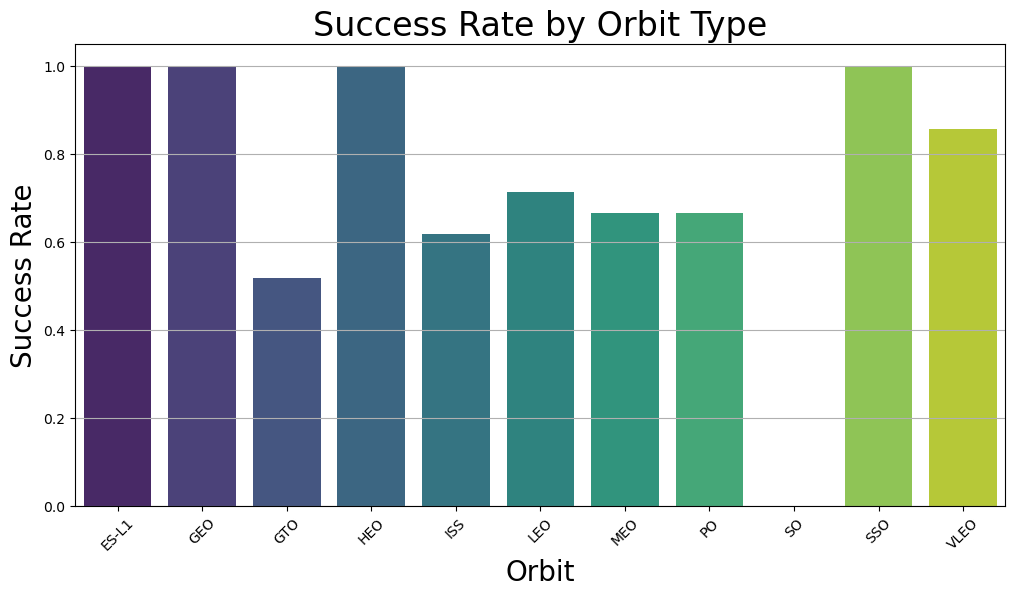

In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column
# SUGERENCIA: use el método groupby en la columna Orbit y obtenga la media de la columna Clase

print(df['Class'].value_counts())

# Agrupar por 'Orbit' y calcular la tasa de éxito
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Class', data=success_rate, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Orbit', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('Success Rate by Orbit Type', fontsize=24)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.

Analice el gráfico de barras trazado, intente encontrar qué órbitas tienen una alta tasa de éxito.

El gráfico de barras ofrece una visualización clara del rendimiento de las misiones según el tipo de órbita. Identificar las órbitas con altas tasas de éxito permite tomar decisiones informadas sobre futuros lanzamientos y mejorar los procesos de diseño y planificación en la industria espacial.

Órbitas con Éxito Superior: Busca las barras que representan las órbitas con tasas de éxito cercanas o iguales a 1.0. Estas indican que todas las misiones lanzadas a esas órbitas fueron exitosas.

Órbitas con Éxito Inferior: Las barras que se acercan a 0 o tienen un valor bajo (por ejemplo, 0.2 o 0.4) indican un mayor número de fracasos. 

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

### TAREA 4: Visualizar la relación entre el número de vuelo y el tipo de órbita

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

Para cada órbita, queremos ver si hay alguna relación entre FlightNumber y Orbit type.

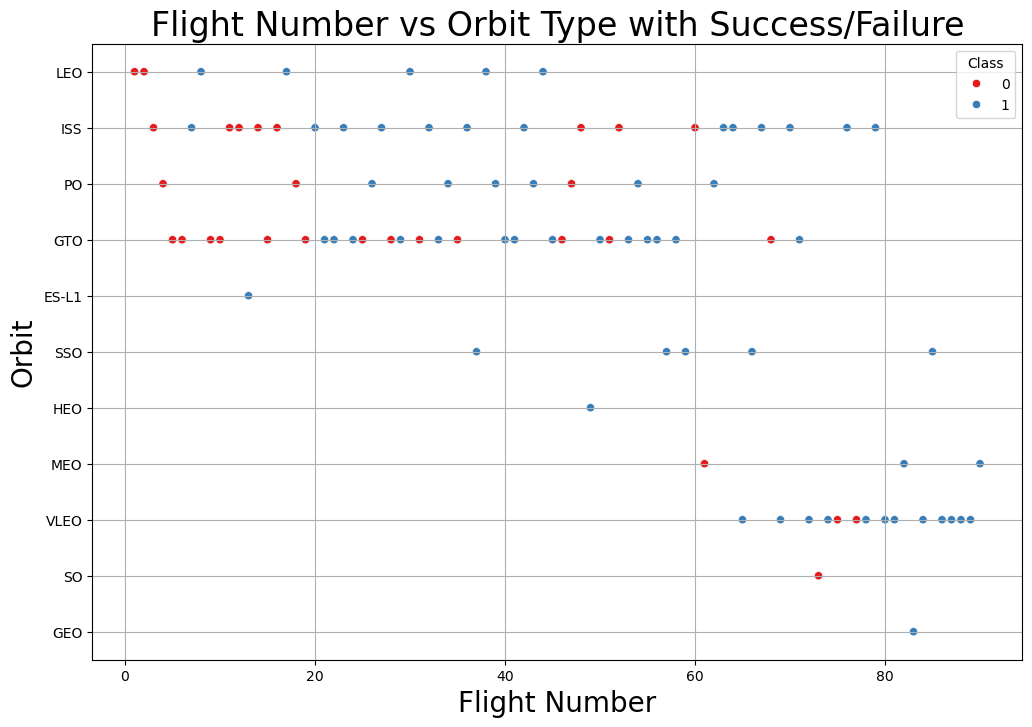

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Traza un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='Set1')

# Añadir etiquetas y título
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.title('Flight Number vs Orbit Type with Success/Failure', fontsize=24)
plt.legend(title='Class', loc='upper right')
plt.grid()
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Deberías ver que en la órbita LEO el Éxito aparece relacionado con el número de vuelos; por otro lado, no parece haber relación entre el número de vuelo cuando está en órbita GTO.

### TASK  5: Visualize the relationship between Payload and Orbit type
### TAREA 5: Visualizar la relación entre la carga útil y el tipo de órbita

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

Del mismo modo, podemos trazar los gráficos de puntos de dispersión de la carga útil frente a la órbita para revelar la relación entre la carga útil y el tipo de órbita

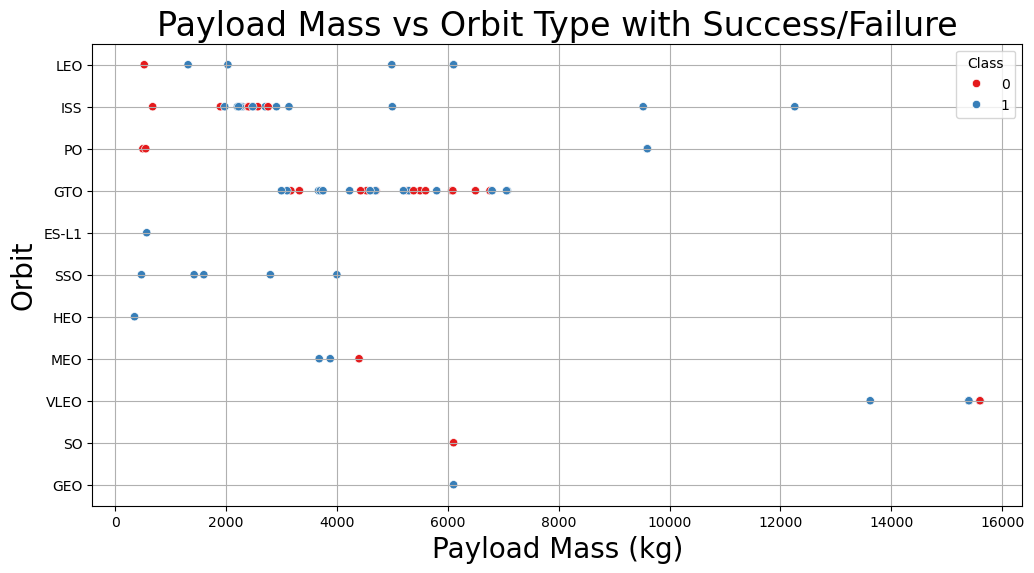

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Traza un gráfico de puntos de dispersión con el eje x como carga útil y el eje y como órbita, y hue como el valor de la clase
# Traza un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='Set1')

# Añadir etiquetas y título
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Orbit', fontsize=20)
plt.title('Payload Mass vs Orbit Type with Success/Failure', fontsize=24)
plt.legend(title='Class')
plt.grid()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

Con cargas útiles pesadas, el aterrizaje exitoso o la tasa de aterrizaje positivo son más para Polar, LEO e ISS.   

Sin embargo, para GTO no podemos distinguir esto bien, ya que tanto la tasa de aterrizaje positiva como la negativa (misión fallida) están ahí aquí.


### TASK  6: Visualize the launch success yearly trend
### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 

Puede trazar un gráfico de líneas en el que el eje x sea <code>el año</code> y el eje y la tasa de éxito media, para obtener la tendencia media de éxito del lanzamiento.

The function will help you get the year from the date:

La función le ayudará a obtener el año a partir de la fecha:

In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

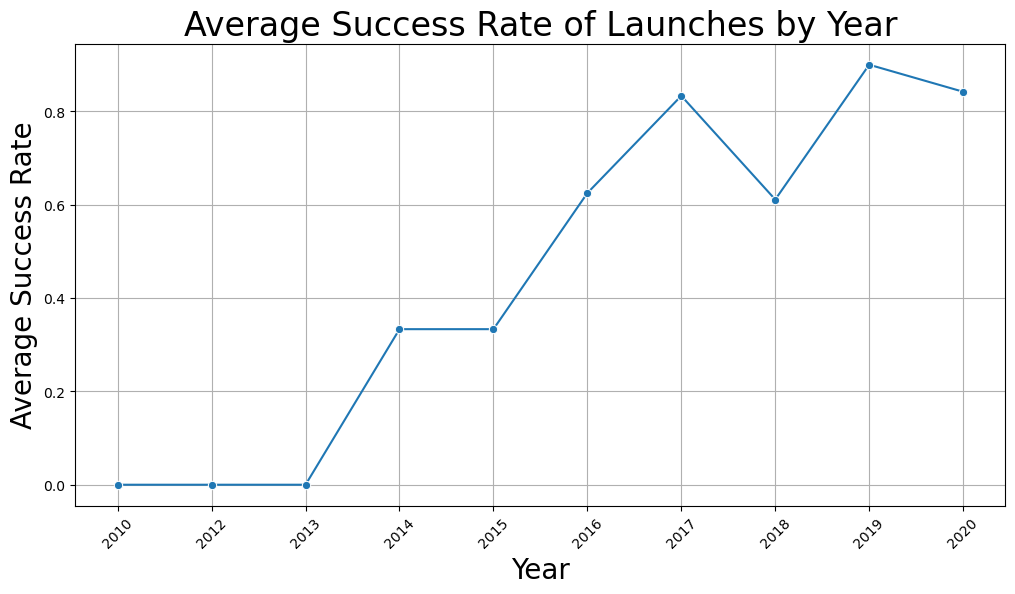

In [12]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Extraer los años
df['Year'] = Extract_year(df['Date'])

# Calcular la tasa de éxito media por año
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Traza el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Class', data=success_rate_by_year, marker='o')

# Añadir etiquetas y título
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Success Rate', fontsize=20)
plt.title('Average Success Rate of Launches by Year', fontsize=24)
plt.xticks(rotation=45)
plt.grid()
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2017 (estable en 2014) y después de 2015 comenzó a aumentar.

## Features Engineering 

## Ingeniería de características

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

A estas alturas, debería obtener algunos conocimientos preliminares sobre cómo cada variable importante afectaría la tasa de éxito, seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns

 ### TAREA 7: Crear variables ficticias en columnas categóricas

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


Utilice el marco de datos de función <code>get_dummies</code> y <code>features</code> para aplicar OneHotEncoder a la columna <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code>, muestre los resultados utilizando el encabezado del método. El marco de datos de resultados debe incluir todas las características, incluidas las codificadas.

In [14]:
# HINT: Use get_dummies() function on the categorical columns

# Crear variables ficticias para columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Mostrar el resultado
print(features_one_hot.head())



   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_GEO  Orbit_GTO  ...  Serial_B1048  Serial_B1049  \
0            0      False      False  ...         False         False   
1            0      False      False  ...         False         False   
2            0      False      False  ...         False         False   
3            0      False      False  ...         False         False   
4            0      False       True  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False         False    

### TASK  8: Cast all numeric columns to `float64`

### TAREA 8: Convertir todas las columnas numéricas en 'float64'

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

Ahora que nuestro marco <code>de datos features_one_hot</code> solo contiene números, convierta todo el marco de datos a tipo <code>variable float64</code>

In [15]:
# HINT: use astype function
# Convertir todas las columnas numéricas a tipo float64
features_one_hot = features_one_hot.astype('float64')

# Mostrar el tipo de datos de cada columna para verificar la conversión
print(features_one_hot.dtypes)


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [16]:
# Export the DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
